In [16]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [17]:
!pip3 install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
df = pd.read_csv("/content/gdrive/MyDrive/archive/CamVid/class_dict.csv")
label_dict = dict()
df
for x,rows in enumerate(df.iterrows()):
    rgb = [rows[1]['r'],rows[1]['g'],rows[1]['b']]
    label_dict[x] = rgb

In [31]:
label_dict

{0: [64, 128, 64],
 1: [192, 0, 128],
 2: [0, 128, 192],
 3: [0, 128, 64],
 4: [128, 0, 0],
 5: [64, 0, 128],
 6: [64, 0, 192],
 7: [192, 128, 64],
 8: [192, 192, 128],
 9: [64, 64, 128],
 10: [128, 0, 192],
 11: [192, 0, 64],
 12: [128, 128, 64],
 13: [192, 0, 192],
 14: [128, 64, 64],
 15: [64, 192, 128],
 16: [64, 64, 0],
 17: [128, 64, 128],
 18: [128, 128, 192],
 19: [0, 0, 192],
 20: [192, 128, 128],
 21: [128, 128, 128],
 22: [64, 128, 192],
 23: [0, 0, 64],
 24: [0, 64, 64],
 25: [192, 64, 128],
 26: [128, 128, 0],
 27: [192, 128, 192],
 28: [64, 0, 64],
 29: [192, 192, 0],
 30: [0, 0, 0],
 31: [64, 192, 0]}

In [43]:
img = cv2.imread("/content/gdrive/MyDrive/archive/CamVid/train/0001TP_009210.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = cv2.imread("/content/gdrive/MyDrive/archive/CamVid/train_labels/0001TP_009210_L.png")
mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
print(img .shape)
print(mask.shape)

(720, 960, 3)
(720, 960, 3)


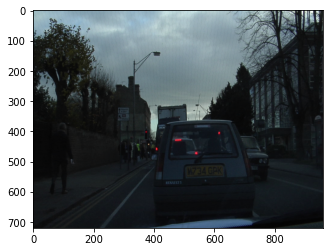

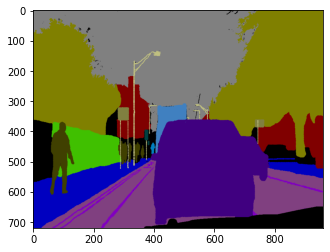

In [44]:
plt.figure(1)
plt.subplot(111)
plt.imshow(img)
plt.show()
plt.subplot(111)
plt.imshow(mask)
plt.show()

In [37]:
df

,name,r,g,b
0,Animal,64,128,64
1,Archway,192,0,128
2,Bicyclist,0,128,192
3,Bridge,0,128,64
4,Building,128,0,0
5,Car,64,0,128
6,CartLuggagePram,64,0,192
7,Child,192,128,64
8,Column_Pole,192,192,128
9,Fence,64,64,128


There are total 32 classes in thee total images

In [21]:
# def colortogray(cn):
#     cn = np.reshape(cn, (1, 1, 3));
#     cn = cv2.cvtColor(cn, cv2.COLOR_BGR2GRAY);
#     return cn
# #these are the colors that are used for making the boundaries(ie classfication colours)    
# colors = [];
# colors.append(colortogray(np.array([64, 128, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 0, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 128, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 128, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 0, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 0, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 0, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 128, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 192, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 64, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 0, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 0, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 128, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 0, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 64, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 192, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 64, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 64, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 128, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 0, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 128, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 128, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 128, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 0, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 64, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([128, 64, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 128, 128], dtype = 'uint8')))
# colors.append(colortogray(np.array([192, 128, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([64, 0, 64], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 192, 192], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 0, 0], dtype = 'uint8')))
# colors.append(colortogray(np.array([0, 192, 64], dtype = 'uint8')))

# def class_pixel(label_img):
#      #      if label_img[0].any() == c[0] and label_img[1].any() == c[1] and label_img[2].any() == c[2]:
#       #for i in range(128):
#           #for j in range(128):
#             #for k in range(3):
#              # if label_img[k, i, j].any() == c.any():
#                   #class_pix = index
#     #return class_pix

#     class_pix = np.ones([128, 128, 1], dtype = int);
#     for index, c in enumerate(colors):
#         class_pix[label_img == c] = index
#     return class_pix

# # Convert all segmented images into labeled images with appropriate class number.

# def label_img_list(img_list):
#     images = []
#     for image in img_list:
#         images.append(class_pixel(image))
#     return images

In [22]:
# transform_img = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
# transform_img_label = transforms.Compose([transforms.ToTensor()])

In [38]:
def adjust_mask(mask,label_dict):
    segmentation_map_list = []
    for x,color in enumerate(label_dict.values()):
        segmentation_map = (mask==color).all(axis=-1)
        segmentation_map=(segmentation_map*1)
        segmentation_map*=x
        segmentation_map_list.append(segmentation_map)
        
    return np.amax(np.stack(segmentation_map_list,axis=-1),axis=-1)

def convert_n_channels_2_rgb(image,label_dict):
    image = np.amax(image,axis=-1)
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in label_dict.keys():
        idx = image==l
        r[idx] = label_dict[l][0]
        g[idx] = label_dict[l][1]
        b[idx] = label_dict[l][2]
    return np.stack([r,g,b],axis=-1)

In [45]:
import glob
class CamVidDataset(Dataset):
    def __init__(self,label_dict,IMAGE_PATH,MASK_PATH,transforms,mask_transforms):
        self.image_list = glob.glob(IMAGE_PATH)
        self.label_list = glob.glob(MASK_PATH)
        self.label_dict = label_dict
        self.transform = transforms
        self.mask_transforms = mask_transforms
        
        self.image_list.sort()
        self.label_list.sort()
        
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self,idx):
        img = cv2.imread(self.image_list[idx])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.label_list[idx])
        mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

        if self.transform:
            img = self.transform(img)
        
        if self.mask_transforms:
            mask = self.mask_transforms(mask)
            
        mask = np.array(mask)
        mask = adjust_mask(mask,self.label_dict)
        mask = torch.tensor(mask)
        mask = torch.squeeze(mask,dim=0)
        return img,mask

In [47]:
transform=transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((128,128)),
        transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ])

mask_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((128,128))
    ])

In [49]:
IMAGE_PATH = "/content/gdrive/MyDrive/archive/CamVid/train/*.png"
MASK_PATH = "/content/gdrive/MyDrive/archive/CamVid/train_labels/*.png"

VAL_PATH = "/content/gdrive/MyDrive/archive/CamVid/val/*.png"
VAL_MASK = "/content/gdrive/MyDrive/archive/CamVid/val_labels/*.png"

TEST_PATH = "/content/gdrive/MyDrive/archive/CamVid/test/*.png"
TEST_MASK = "/content/gdrive/MyDrive/archive/CamVid/test_labels/*png"

In [50]:
traindataset = CamVidDataset(label_dict,IMAGE_PATH,MASK_PATH,transform,mask_transforms)
# trainloader = DataLoader(train_dataset,batch_size = 32,shuffle = True)

valdataset = CamVidDataset(label_dict,VAL_PATH,VAL_MASK,transform,mask_transforms)
# val_loader = DataLoader(val_dataset,batch_size = 32,shuffle = True)
# dataset = ConcatDataset([train_dataset,val_dataset])
testdataset = CamVidDataset(label_dict,TEST_PATH,TEST_MASK,transform,mask_transforms)

In [51]:
train_loader = data.DataLoader(traindataset, batch_size = 1, shuffle=True,  num_workers=4)
val_loader = data.DataLoader(valdataset, batch_size = 1, shuffle=True,  num_workers=4)
test_loader = data.DataLoader(testdataset, batch_size = 1, shuffle=True,  num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Defining the Unet model, the first part of the U is made by conv2d class and the second part is made by convTranspose2d.

In [52]:
class u_net(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 64, 3)
      self.conv2 = nn.Conv2d(64, 128, 3)
      self.conv3 = nn.Conv2d(128, 256, 3)
      self.conv4 = nn.Conv2d(256, 512, 3)
      self.conv5 = nn.Conv2d(512, 1024, 3)
      self.conv6 = nn.Conv2d(1024, 512, 3)
      self.conv7 = nn.Conv2d(512, 512, 3)
      self.conv8 = nn.Conv2d(512, 256, 3)
      self.conv9 = nn.Conv2d(256, 256, 3)
      self.conv10 = nn.Conv2d(256, 128, 3)
      self.conv11 = nn.Conv2d(128, 128, 3)
      self.conv12 = nn.Conv2d(64, 64, 3)
      self.b1 = nn.BatchNorm2d(64)
      self.b2 = nn.BatchNorm2d(128)
      self.b3 = nn.BatchNorm2d(256)
      self.b4 = nn.BatchNorm2d(512)
      self.b5 = nn.BatchNorm2d(1024)
      self.convT1 = nn.ConvTranspose2d(1024, 512, 2, 2)
      self.convT2 = nn.ConvTranspose2d(512, 256, 2, 2)
      self.convT3 = nn.ConvTranspose2d(256, 256, 2, 2)
      self.convT4 = nn.ConvTranspose2d(128, 64, 2, 2)
      self.convT5 = nn.ConvTranspose2d(64, 32, 2, 2)
      self.pool1 = nn.MaxPool2d(2, 2)

    def forward(self, x):
      x = F.relu(self.b1(self.conv1(x)))
      x = F.relu(self.b1(self.conv12(x)))
      x = F.relu(self.b2(self.conv2(x)))
      x = self.pool1(x)
      x = F.relu(self.b2(self.conv11(x)))
      x = F.relu(self.b3(self.conv3(x)))
      x1 = x
      x1 = x1[:, :, int((58 - 24)/2) : int((58 + 24)/2), int((58 - 24)/2) : int((58 + 24)/2)];
      x = self.pool1(x)
      x = F.relu(self.b3(self.conv9(x)))
      x = F.relu(self.b4(self.conv4(x)))
      x2 = x
      x2 = x2[:, :, int((25 - 16)/2) : int((25 + 16)/2), int((25 - 16)/2) : int((25 + 16)/2)];
      x = self.pool1(x)
      x = F.relu(self.b4(self.conv7(x)))
      x = F.relu(self.b5(self.conv5(x)))
      x = self.b4(self.convT1(x))
      x = torch.cat((x2, x), dim = 1)
      x = F.relu(self.b4(self.conv6(x)))
      x = F.relu(self.b4(self.conv7(x)))
      x = self.b3(self.convT2(x))
      x = torch.cat((x1, x), dim = 1)
      x = F.relu(self.b3(self.conv8(x)))
      x = F.relu(self.b3(self.conv9(x)))
      x = self.b3(self.convT3(x))
      x = F.relu(self.b2(self.conv10(x)))
      x = F.relu(self.b2(self.conv11(x)))
      x = F.relu(self.b2(self.conv11(x)))
      x = F.relu(self.b2(self.conv11(x)))
      x = self.b1(self.convT4(x))
      x = self.convT5(x)
      del x1
      del x2
      return x
net = u_net()
print(net)

u_net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv10): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
UNET = u_net()
UNET.to(device)

cpu


u_net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv10): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True

In [57]:
loss1 = nn.CrossEntropyLoss()
optimizer = optim.Adam(UNET.parameters(), lr = 0.0001, betas = (0.9, 0.999), eps = 1e-08, weight_decay=0, amsgrad=False)

In [ ]:
for epoch in range(100):
  running_loss_train = 0
  running_loss_val = 0
  sum = 0
  for i, data in enumerate(train_loader):  
    inputs, labels = data;
    if labels.size() == torch.Size([1, 1, 128, 128]):
      labels = labels.reshape(1, 128, 128)
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = UNET(inputs)
    loss_train= loss1(outputs, labels)
    running_loss_train=(loss_train.item()*inputs.size(0))
    sum = sum + running_loss_train
    loss_train.backward()
    optimizer.step()
    print("Epoch:{epoch} Train loss:{train_loss}".format(epoch = epoch+1, train_loss = running_loss_train))
  print("avg.train_loss:{avg_loss}".format(avg_loss = sum/len(traindataset)))

Streaming output truncated to the last 5000 lines.
Epoch:2 Train loss:1.9087088108062744
Epoch:2 Train loss:1.6997851133346558
Epoch:2 Train loss:1.716243863105774
Epoch:2 Train loss:1.7337801456451416
Epoch:2 Train loss:2.0347182750701904
Epoch:2 Train loss:1.6302595138549805
Epoch:2 Train loss:1.5818119049072266
Epoch:2 Train loss:2.254269599914551
Epoch:2 Train loss:1.7892003059387207
Epoch:2 Train loss:1.7201805114746094
Epoch:2 Train loss:1.7275433540344238
Epoch:2 Train loss:1.9217967987060547
Epoch:2 Train loss:2.0238089561462402
Epoch:2 Train loss:1.7096670866012573
Epoch:2 Train loss:1.7575113773345947
Epoch:2 Train loss:2.4001102447509766
Epoch:2 Train loss:2.072920799255371
Epoch:2 Train loss:2.327554941177368
Epoch:2 Train loss:1.6127514839172363
Epoch:2 Train loss:1.5712450742721558
Epoch:2 Train loss:2.0606157779693604
Epoch:2 Train loss:1.9014861583709717
Epoch:2 Train loss:1.5687679052352905
Epoch:2 Train loss:1.7668782472610474
Epoch:2 Train loss:2.692718029022217
Epoc

In [ ]:
#Saving the model to the gdrive.
PATH = '/content/gdrive/MyDrive/archive/CamVid/saved1.pth'
torch.save(UNET.state_dict(),PATH); # A state_dict is simply a Python dictionary 
# object that maps each layer to its parameter tensor.